# Une régression logistique sur MNIST pour la reconnaissance de chiffres manuscrits

In [6]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

## Charger les données du MNIST Dataset

Plusieurs manières de faire, certaines plus fastidieuses que d'autres, une petite recherche Google vous donnera toutes les informations nécessaires. Moi je vais me contenter de l'importer depuis keras.datasets.

In [7]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [8]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


## Affichage des images

In [9]:
def afficher_images(nb_images_a_afficher, nb_colonnes=5):
    nb_lignes = nb_images_a_afficher//nb_colonnes+1

    plt.figure(figsize=(20,5*nb_lignes))
    for index, (image, label) in enumerate(zip(X_train[0:nb_images_a_afficher], y_train[0:nb_images_a_afficher])):
        plt.subplot(nb_lignes, nb_colonnes, index + 1)
        plt.imshow(image, cmap=plt.cm.gray)
        plt.title('Training: %i\n' % label, fontsize = 15)

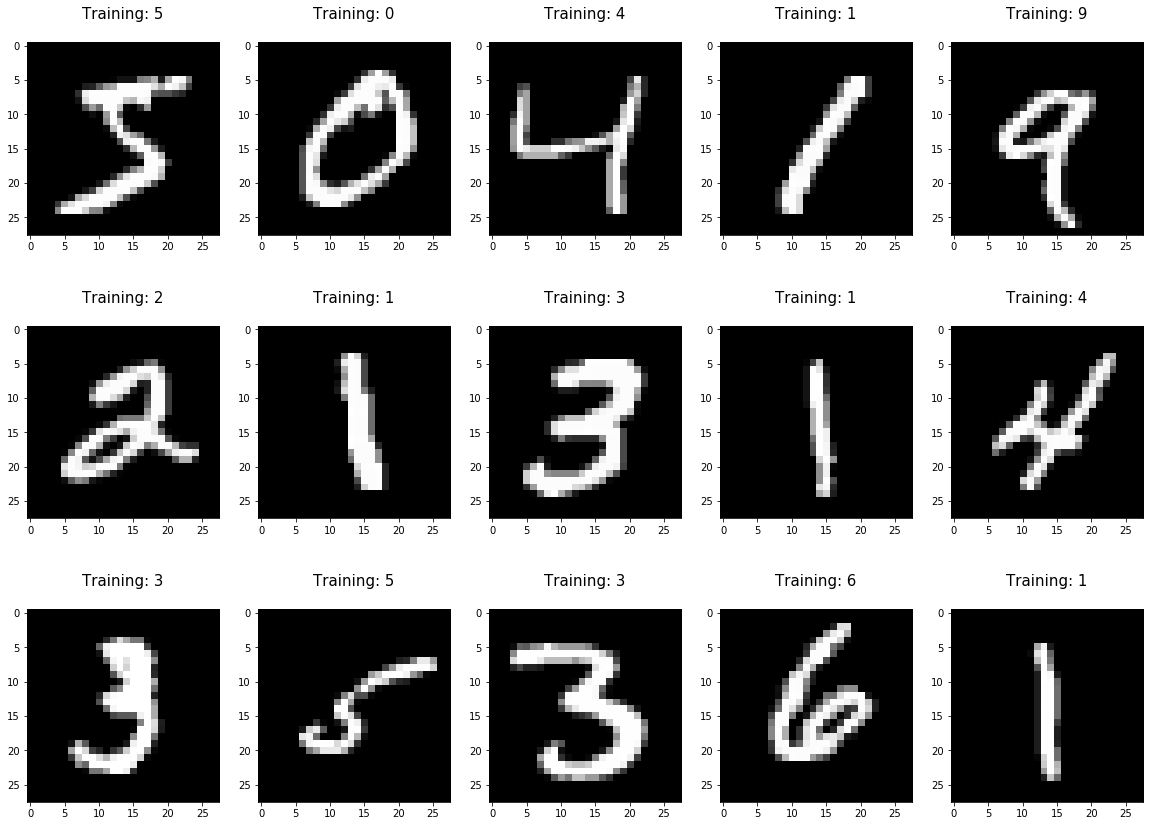

In [10]:
afficher_images(15)

## Modification du shape de X_train et X_test pour avoir un array de dimension 2

In [11]:
X_train = X_train.reshape(60000,-1)
X_test = X_test.reshape(10000,-1)

## La régression logistique

In [12]:
# 1.import du modèle
from sklearn.linear_model import LogisticRegression 
# 2.instanciation du modèle
reglog = LogisticRegression(solver='lbfgs')
# 3.entrainement du modèle 
reglog.fit(X_train, y_train)
# 4.prédictions
reglog.predict(X_test[0].reshape(1,-1)) # de un élément
reglog.predict(X_test[0:10]) # de plusieurs éléments
y_pred = reglog.predict(X_test) # de tout le set de test
y_pred.shape

C:\Users\antoi\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


(10000,)

## Évaluation du modèle

### Accuracy

In [ ]:
# La méthdode scor du modèle renvoie l'accuracy
score = reglog.score(X_test, y_test)
score

### Precision et recall

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

### La matrice de confusion

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [ ]:
# affichage sous forme de dataframe
cm = pd.DataFrame(cm, columns=['prédit ' + str(_) for _ in reglog.classes_])
cm.index = ['vrai ' + str(_) for _ in reglog.classes_]
cm

In [ ]:
# affichage sous forme de graphique avec sns.heatmap
plt.figure(figsize=(12,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Reds');
plt.ylabel('Vrai label');
plt.xlabel('Label prédit');
all_sample_title = 'Accuracy Score: {:.3f}'.format(score)
plt.title(all_sample_title, size = 15);

## Affichage des images qui ont été mal classées

Essayer de faire d'afficher les images quion été mal classées avec leurs labels prédit et vrai.

In [ ]:
mal_classees = []
for index, (pred, vrai) in enumerate(zip(y_pred, y_test)):
    if pred != vrai: 
        mal_classees.append(index)
len(mal_classees)

In [ ]:
nb_colonnes=5
nb_images_a_afficher = 20
nb_lignes = nb_images_a_afficher//nb_colonnes+1

plt.figure(figsize=(20,5*nb_lignes))
for i in range(nb_images_a_afficher):
    idx_image = mal_classees[i]
    plt.subplot(5, 5, i + 1)
    plt.imshow(np.reshape(X_test[idx_image], (28,28)), cmap='inferno')
    plt.title('Prédit {} alors que {}'.format(y_pred[idx_image], y_test[idx_image]), fontsize = 15)

## Performance du modèle en fonction de la taille du trainin set

In [ ]:
plt.figure(figsize = (24,16));

sample_size = [100, 1000, 3000, 60000]
for i,s in enumerate(sample_size):
    plt.subplot(2,2,i+1)
    X = X_train[:s].reshape(s,-1)
    y = y_train[:s]
    reglog.fit(X, y)
    pred = reglog.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    #cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, cmap = 'Reds', cbar = False)
    accuracyString = 'Score sur un training set de taille {:g}: {:.3f}'.format(s, reglog.score(X_test, y_test)) 
    plt.title(accuracyString, size = 20)
    plt.xlabel('Label prédit', fontsize = 12)
    plt.ylabel('Vrai label', fontsize = 12);